# 🧩 1.1 – Introducción al módulo `re`

Bienvenido al primer notebook del **Módulo 1 – Expresiones Regulares**.

Las **expresiones regulares (regex)** permiten **buscar, validar y manipular texto** de manera muy potente.
Python las soporta a través del módulo estándar `re`.

---
## 🎯 Objetivos
- Comprender qué es una expresión regular.
- Conocer las funciones básicas del módulo `re`.
- Buscar, reemplazar y extraer patrones sencillos de texto.

> 💡 **Nota didáctica:**
> Ejecuta las celdas **en orden** o usa *Ejecutar todo* (`Ctrl+Shift+Enter`) para que las variables estén disponibles.

---
## 1️⃣ Importar el módulo `re`

Todas las operaciones de expresiones regulares se realizan con el módulo estándar de Python llamado `re`.

Ejecuta la celda siguiente para importarlo:

In [2]:
import re
print('✅ Módulo re importado correctamente.')

✅ Módulo re importado correctamente.


---
## 2️⃣ Buscar texto con `match()` y `search()`

Ambas funciones buscan coincidencias, pero hay una diferencia importante:

| Función | Busca en... |
|:--------|:------------|
| `re.match()` | solo al **inicio** del texto |
| `re.search()` | en **cualquier parte** del texto |

Veamos un ejemplo:

In [4]:
texto = "Python es potente y divertido"

inicio = re.match(r"Python", texto)
''' 
re.match(pattern, string, flags)
- pattern: la expresión regular que queremos encontrar
- string: el texto en el que hay que buscar la expresión regular
- flags: dice cómo se debe comportar la búsqueda (ignorar mayúsculas, etc.)
'''

cualquiera = re.search(r"divertido", texto)
'''
re.search(pattern, string)
'''

print('Resultado de match →', inicio)
print('Resultado de search →', cualquiera)
print('Texto encontrado:', cualquiera.group()) # .group() devuelve el texto encontrado

Resultado de match → <re.Match object; span=(0, 6), match='Python'>
Resultado de search → <re.Match object; span=(20, 29), match='divertido'>
Texto encontrado: divertido


In [16]:
# Ejemplo de match

texto = 'Buenas tardes, señora'
palabra= 'buenas'
inicio = re.match(palabra, texto, flags= re.IGNORECASE)

if inicio:
    print(f"El texto empieza con '{palabra}'")
else:
    print(f"El texto no empieza con '{palabra}'")

El texto empieza con 'buenas'


In [17]:
# Ejemplo de search

texto = 'Buenas tardes, señora'
palabra= 'señora'
contiene = re.search(palabra, texto, flags= re.IGNORECASE)

if contiene:
    print(f"El texto contiene la palabra '{palabra}'")
else:
    print(f"El texto contiene la palabra '{palabra}'")

El texto contiene la palabra 'señora'


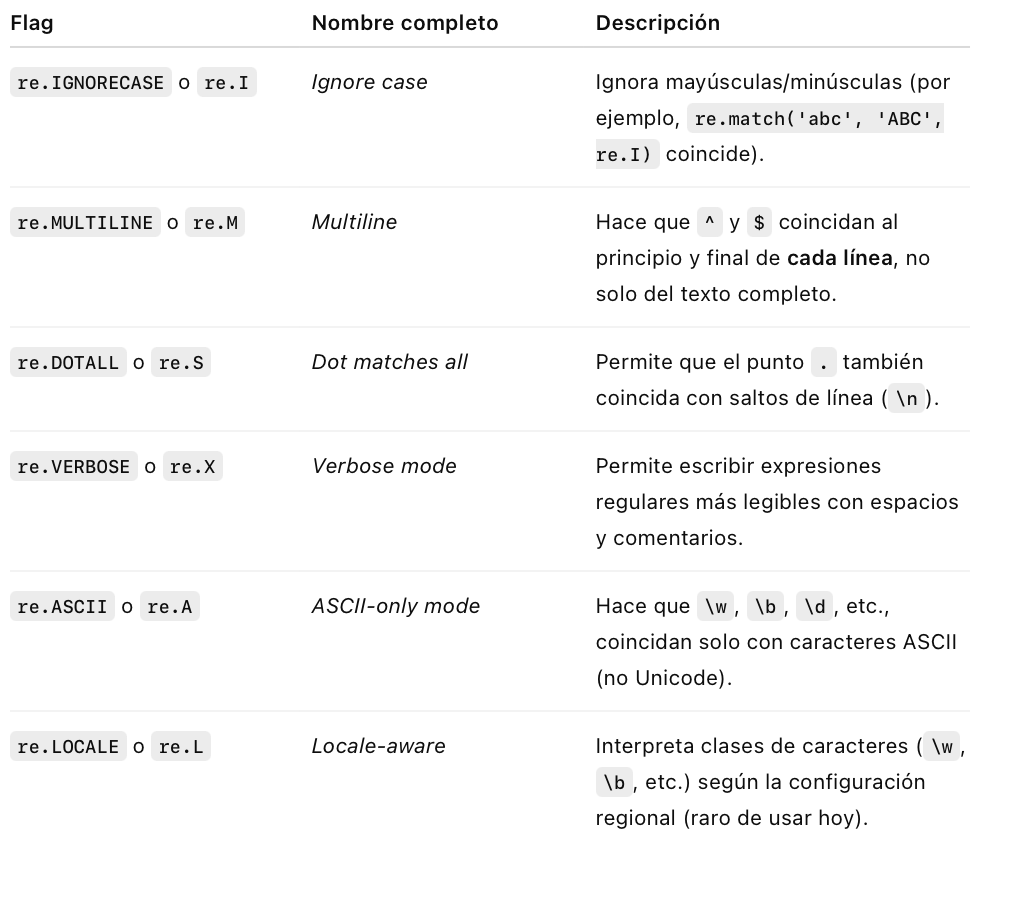

Un objeto de tipo re.Match tiene varios atributos y métodos para obtener más información de lo que ha encontrado:
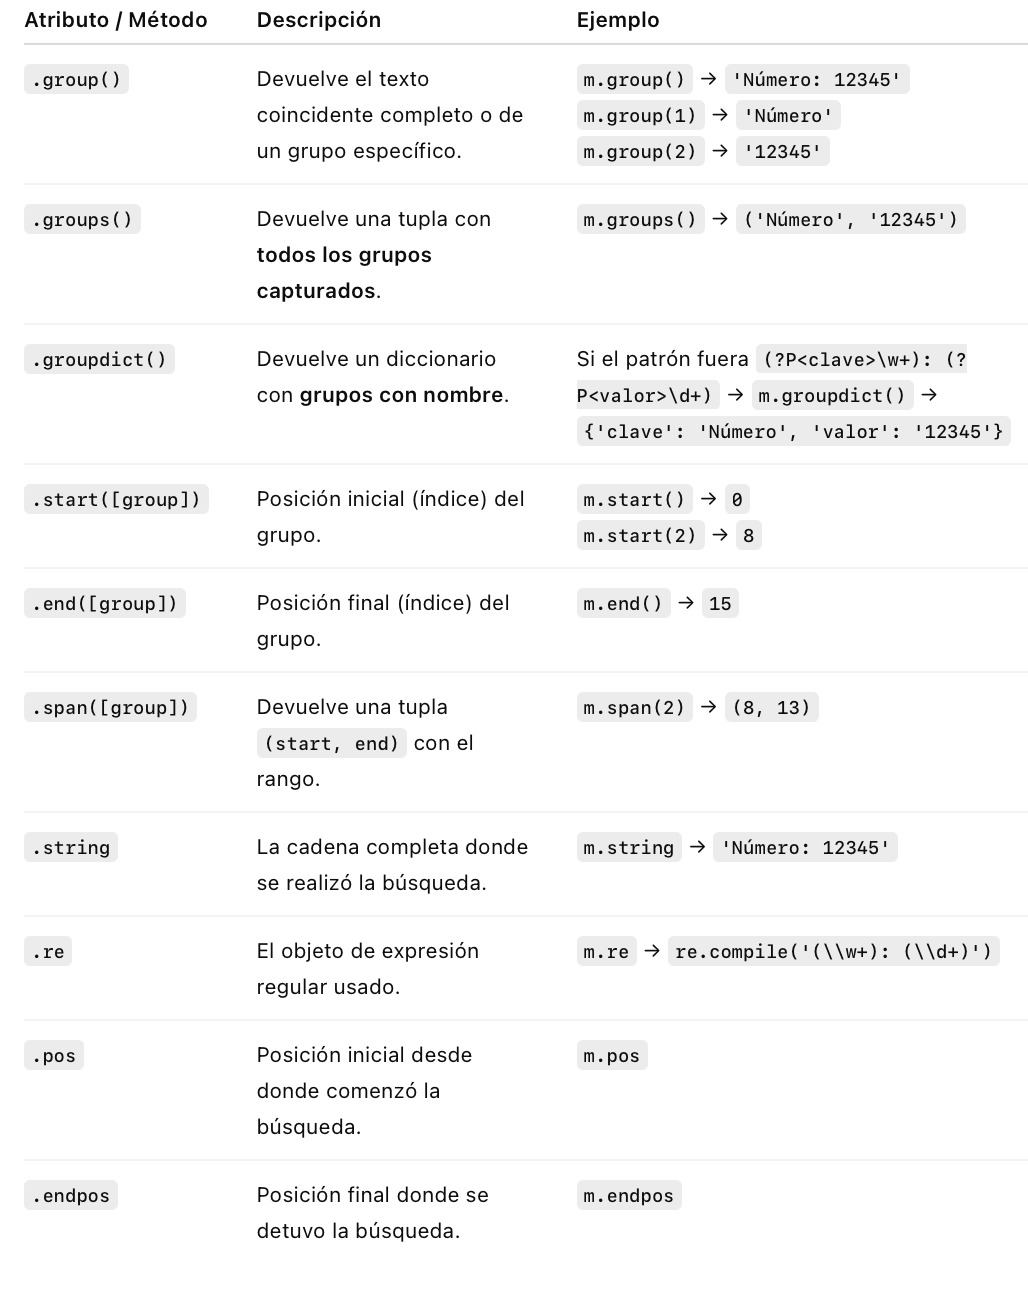

In [20]:
texto = "Número: 12345"
m = re.match(r"(\w+): (\d+)", texto) # lo que hay dentro de cada paréntesis es un grupo de captura.

if m:
    print("Coincidencia:", m.group())         # 'Número: 12345'
    print("Grupo 1:", m.group(1))            # 'Número'
    print("Grupo 2:", m.group(2))            # '12345'
    print("Todos los grupos:", m.groups())   # ('Número', '12345')
    print("Posición del grupo 2:", m.span(2))# (8, 13)


Coincidencia: Número: 12345
Grupo 1: Número
Grupo 2: 12345
Todos los grupos: ('Número', '12345')
Posición del grupo 2: (8, 13)


✅ `re.match()` devuelve una coincidencia **solo si el patrón aparece al principio**.

✅ `re.search()` devuelve la **primera coincidencia encontrada** en cualquier parte del texto.

Ambas devuelven un objeto `Match` que tiene métodos útiles como `.group()`, `.start()`, `.end()` o `.span()`.

---
## 3️⃣ Buscar todas las coincidencias con `findall()`

Si queremos obtener **todas las apariciones** de un patrón, usamos `re.findall()`.

Ejemplo: buscar todos los números (`\d+`) en una cadena.

In [21]:
texto = "Tengo 2 perros, 3 gatos y 15 peces."
numeros = re.findall(r"\d+", texto)
print('Coincidencias encontradas:', numeros)

Coincidencias encontradas: ['2', '3', '15']


✅ El resultado es una **lista de strings**: `['2', '3', '15']`.

✅ Si el patrón tiene grupos, el resultado sería una **lista de tuplas**

> 💡 Usa siempre *raw strings* (`r"texto"`) al definir patrones, para evitar problemas con los `\` (barras invertidas).

---
## 4️⃣ Reemplazar texto con `sub()`

La función `re.sub(patron, reemplazo, texto, count=0, flags= 0)` permite **sustituir coincidencias** por otro valor.

- pattern: la expresión regular que quieres buscar
- repl: el texto (o función) que reemplazará cada coincidencia
- string: la cadena de texto original
- count: cuántas sustituciones hacer (por defecto, 0, que significa "todas")
- flags: modificadores opcionales (como re.I, re.M, etc.)

Devuelve un string con el texto resultante después de realizar los reemplazos. Si queremos saber cuántos reemplazos se han hecho, en vez de **sub** usamos **subn**.

La función `re.subn(patron, reemplazo, texto, count=0, flags= 0)` devuelve una tupla con dos elementos (texto_modificado, número de reemplazos)

**Ejemplo**: reemplazar todos los números por el símbolo `#`.

In [25]:
texto = "Hay 3 coches y 5 motos."
nuevo_texto = re.subn(r"\d+", "#", texto)
print(nuevo_texto)

('Hay # coches y # motos.', 2)


✅ Salida esperada: `Hay # coches y # motos.`

Esto es muy útil para **anonimizar** o **limpiar** datos.

---
## 5️⃣ Ejercicio guiado – Buscar números y nombres propios

Dado el siguiente texto, encuentra:
- todos los **números**
- todas las **palabras que comienzan por mayúscula** (nombres propios)

💡 *Pistas:*
- Usa `\d+` para números.
- Usa `\b[A-Z][a-z]+` para palabras con mayúscula inicial.

---
### ✏️ Escribe tu código aquí:

In [27]:
texto = "El 14 de Marzo Ana y Luis corrieron 5 Km y llegaron a las 10."

# TODO: escribe tus expresiones regulares
numeros = re.findall(r"\d+", texto, flags= 0)
nombres = re.findall(r"\b[A-Z][a-z]+", texto, flags= 0)

print('Números:', numeros)
print('Nombres propios:', nombres)

Números: ['14', '5', '10']
Nombres propios: ['El', 'Marzo', 'Ana', 'Luis', 'Km']


---
## 6️⃣ Solución sugerida
Puedes comparar tu resultado con la solución siguiente:

In [ ]:
numeros = re.findall(r"\d+", texto)
nombres = re.findall(r"\b[A-Z][a-z]+", texto)

print('Números:', numeros)
print('Nombres propios:', nombres)

---
## 7️⃣ Resumen del notebook

- `re.match()` busca solo al inicio del texto en un objeto re.Match.
- `re.search()` busca en cualquier parte en un objeto re.Match.
- `re.findall()` devuelve todas las coincidencias en una lista de strings o lista de tuplas si hay grupos de búsqueda.
- `re.sub()` reemplaza coincidencias y devuelve el texto ya modificado.
- `re.subn()` reemplaza coincidencias y devuelve una tupla con dos elementos. El primer elemento es el texto ya modificado y el segundo elemento es el número de modificaciones que ha hecho.

👉 Usa estas funciones como base para el resto del módulo de **expresiones regulares**.

---
**Fin del notebook 1.1 – Introducción al módulo `re`.**